# Business Understanding

 * How many males and females, and which of them is the most numerous?
 * What are the most nationalities in this data?
 * How many students got (Low-Level, Middle-Level, High-Level)?







## Design and implement machine learning model to predict a student's final grade in a particular course. 

## I used  Decision Tree for that..

## Importing the libraries

In [162]:
import numpy as np
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score


## Importing the dataset

In [163]:
dataset = pd.read_csv('xAPI-Edu-Data.csv')
dataset.head()


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


## Data cleaning

### Question 1:



#### How many males and females, and which of them is the most numerous?

In [164]:
dataset.gender.value_counts()

M    305
F    175
Name: gender, dtype: int64

<AxesSubplot:>

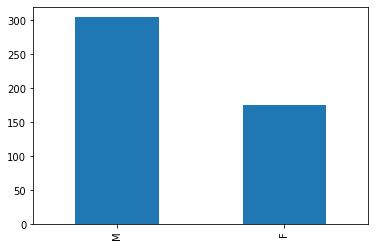

In [165]:
(dataset.gender.value_counts()).sort_values(ascending=False).head().plot.bar(x='gender')

In [166]:
# From the plot we can see that the number of males is grater then females.

In [167]:
dataset['gender'] = dataset['gender'].replace({
   'M':1,
   'F':2
})

In [168]:
dataset.NationalITy.value_counts()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
Iran             6
Lybia            6
USA              6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

## Question 2:


### What are the most nationalities in this data?

In [169]:
(dataset.NationalITy.value_counts()).sort_values(ascending=False).head()

KW           179
Jordan       172
Palestine     28
Iraq          22
lebanon       17
Name: NationalITy, dtype: int64

<AxesSubplot:>

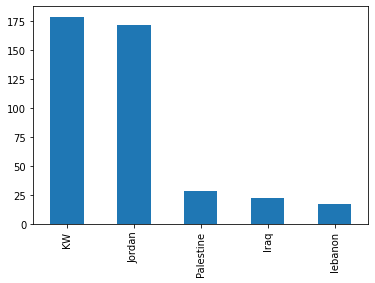

In [170]:
(dataset.NationalITy.value_counts()).sort_values(ascending=False).head().plot.bar(x='NationalITy')

In [171]:
# From the plot shows the number of students by nationalities

In [172]:
dataset['NationalITy'] = dataset['NationalITy'].replace({
    'KW':1,
    'Jordan':2,
    'Palestine':3,
    'Iraq':4,
    'lebanon':5,
    'Tunis':6,
    'SaudiArabia':7,
    'Egypt':8,
    'Syria':9,
    'USA':10,
    'Iran':11,
    'Lybia':12,
    'Morocco':13,
    'venzuela':14
    
})

In [173]:
dataset.PlaceofBirth.value_counts()

KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64

In [174]:
dataset['PlaceofBirth'] = dataset['PlaceofBirth'].replace({
    'KuwaIT':1,
    'Jordan':2,
    'Iraq':3,
    'lebanon':4,
    'USA':5,
    'SaudiArabia':6,
    'Palestine':7,
    'Egypt':8,
    'Tunis':9,
    'Iran':10,
    'Syria':11,
    'Lybia':12,
    'Morocco':13,
    'venzuela':14
    
})

In [175]:
dataset.StageID.value_counts()

MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64

In [176]:
dataset['StageID'] = dataset['StageID'].replace({
    'MiddleSchool':1,
    'lowerlevel':2,
    'HighSchool':3  
})

In [177]:
dataset.GradeID.value_counts()

G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: GradeID, dtype: int64

In [178]:
dataset['GradeID'] = dataset['GradeID'].replace({
    'G-02':2,
    'G-08':8,
    'G-07':7,
    'G-04':4,
    'G-06':6,
    'G-11':11,
    'G-12':12,
    'G-09':9,
    'G-10':10,
    'G-05':5
    
})

In [179]:
dataset.SectionID.value_counts()

A    283
B    167
C     30
Name: SectionID, dtype: int64

In [180]:
dataset['SectionID'] = dataset['SectionID'].replace({
    'A':1,
    'B':2,
    'C':3    
})

In [181]:
dataset.Topic.value_counts()

IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64

In [182]:
dataset['Topic'] = dataset['Topic'].replace({
    'IT':1,
    'French':2,
    'Arabic':3,
    'Science':4,
    'English':5,
    'Biology':6,
    'Spanish':7,
    'Chemistry':8,
    'Geology':9,
    'Quran':10,
    'Math':11,
    'History':12    
})

In [183]:
dataset.Semester.value_counts()

F    245
S    235
Name: Semester, dtype: int64

In [184]:
dataset['Semester'] = dataset['Semester'].replace({
    'F':1,
    'S':2    
})

In [185]:
dataset.Relation.value_counts()

Father    283
Mum       197
Name: Relation, dtype: int64

In [186]:
dataset['Relation'] = dataset['Relation'].replace({
    'Father':1,
    'Mum':2  
})

In [187]:
dataset.raisedhands.value_counts()

10    31
70    31
80    28
72    17
50    17
      ..
61     1
73     1
66     1
28     1
83     1
Name: raisedhands, Length: 82, dtype: int64

In [188]:
dataset.VisITedResources.value_counts()

90    29
80    29
82    16
88    13
12    13
      ..
54     1
63     1
55     1
57     1
43     1
Name: VisITedResources, Length: 89, dtype: int64

In [189]:
dataset.AnnouncementsView.value_counts()

12    21
50    16
42    16
40    16
2     14
      ..
43     1
78     1
75     1
60     1
45     1
Name: AnnouncementsView, Length: 88, dtype: int64

In [190]:
dataset.Discussion.value_counts()

70    24
40    23
33    21
50    18
30    17
      ..
65     1
64     1
62     1
57     1
99     1
Name: Discussion, Length: 90, dtype: int64

In [191]:
dataset.ParentAnsweringSurvey.value_counts()

Yes    270
No     210
Name: ParentAnsweringSurvey, dtype: int64

In [192]:
dataset['ParentAnsweringSurvey'] = dataset['ParentAnsweringSurvey'].replace({
    'Yes':1,
    'No':2    
})

In [193]:
dataset.ParentschoolSatisfaction.value_counts()

Good    292
Bad     188
Name: ParentschoolSatisfaction, dtype: int64

In [194]:
dataset['ParentschoolSatisfaction'] = dataset['ParentschoolSatisfaction'].replace({
    'Good':1,
    'Bad':2
})

In [195]:
dataset.StudentAbsenceDays.value_counts()

Under-7    289
Above-7    191
Name: StudentAbsenceDays, dtype: int64

In [196]:
dataset['StudentAbsenceDays'] = dataset['StudentAbsenceDays'].replace({
    'Under-7':1,
    'Above-7':2
})

In [197]:
dataset.head()


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,1,1,2,4,1,1,1,1,15,16,2,20,1,1,1,M
1,1,1,1,2,4,1,1,1,1,20,20,3,25,1,1,1,M
2,1,1,1,2,4,1,1,1,1,10,7,0,30,2,2,2,L
3,1,1,1,2,4,1,1,1,1,30,25,5,35,2,2,2,L
4,1,1,1,2,4,1,1,1,1,40,50,12,50,2,2,2,M


### Question 3:



### How many students got (Low-Level, Middle-Level, High-Level)?

### ------------------------------------------------------------------
##### Low-Level (L): interval includes values from 0 to 69
##### Middle-Level (M): interval includes values from 70 to 89
##### High-Level (H): interval includes values from 90-100

In [198]:
dataset.Class.value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

<AxesSubplot:>

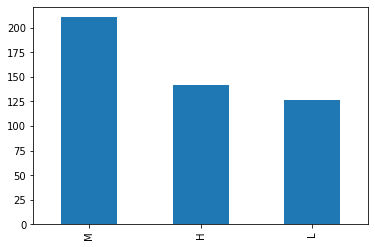

In [199]:
(dataset.Class.value_counts()).sort_values(ascending=False).head().plot.bar(x='Class')

In [200]:
# From the plot shows us the number of students who got in total grades (Low-Level, Middle-Level, High-Level)

# Low-Level (L): interval includes values from 0 to 69
# Middle-Level (M): interval includes values from 70 to 89
# High-Level (H): interval includes values from 90–100

In [201]:
x_df = dataset.drop('Class', axis=1).values
y_df = dataset['Class'].values
x_df

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 1],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=int64)

## Splitting the dataset into the Training set and Test set

In [202]:
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df ,test_size = 0.2, random_state = 0)

In [203]:
#predection=model.predict(X_test)
#predection

In [204]:
sample=[[1,1,1,1,4,1,1,1,1,15,16,2,20,1,1,1]]

In [205]:
print(y_test)

['M' 'L' 'L' 'M' 'H' 'M' 'H' 'L' 'L' 'M' 'H' 'M' 'M' 'L' 'H' 'M' 'M' 'L'
 'M' 'H' 'L' 'M' 'M' 'M' 'M' 'H' 'M' 'M' 'M' 'L' 'M' 'L' 'H' 'M' 'M' 'M'
 'H' 'H' 'M' 'M' 'H' 'L' 'M' 'H' 'H' 'M' 'M' 'M' 'M' 'L' 'M' 'H' 'H' 'L'
 'H' 'H' 'L' 'L' 'M' 'M' 'M' 'M' 'H' 'H' 'H' 'M' 'M' 'M' 'L' 'L' 'L' 'L'
 'M' 'L' 'H' 'M' 'M' 'L' 'M' 'L' 'M' 'M' 'H' 'L' 'L' 'H' 'M' 'H' 'M' 'H'
 'M' 'H' 'H' 'H' 'M' 'H']


## Training the Decision Tree model on the Training set

In [206]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=None)
decision_tree = decision_tree.fit(X_train, y_train)

## Predicting the Test set results and display the:
* Classification accuracy 
* F1 Score

In [207]:
predection1 = decision_tree.predict(X_test)
ac = accuracy_score(y_test,predection1)
clr = classification_report(y_test,predection1)

In [208]:
print(predection1)

['M' 'L' 'L' 'M' 'M' 'H' 'H' 'L' 'L' 'L' 'H' 'L' 'H' 'L' 'M' 'M' 'H' 'L'
 'M' 'H' 'L' 'M' 'M' 'M' 'M' 'H' 'H' 'M' 'M' 'L' 'M' 'L' 'H' 'M' 'M' 'M'
 'H' 'H' 'M' 'M' 'M' 'L' 'H' 'H' 'M' 'M' 'H' 'H' 'L' 'L' 'M' 'L' 'H' 'L'
 'H' 'H' 'L' 'L' 'M' 'M' 'M' 'H' 'H' 'H' 'M' 'M' 'L' 'H' 'L' 'L' 'L' 'L'
 'M' 'L' 'H' 'M' 'M' 'L' 'L' 'M' 'H' 'M' 'M' 'L' 'L' 'H' 'M' 'H' 'M' 'H'
 'M' 'H' 'H' 'H' 'M' 'H']


In [209]:
predection2 = decision_tree.predict(sample)
print(predection2)

['M']


In [210]:
print(ac)

0.7604166666666666


In [211]:
print(clr)

              precision    recall  f1-score   support

           H       0.68      0.75      0.71        28
           L       0.79      0.96      0.86        23
           M       0.81      0.67      0.73        45

    accuracy                           0.76        96
   macro avg       0.76      0.79      0.77        96
weighted avg       0.77      0.76      0.76        96



# Conclusion:

## In this project, we were able to answer 3 questions and created a model that predicts students' grades.

In [212]:
#export the dataframe to csv file:

In [213]:
dataset.to_csv('students dataset.csv')